# Unemployment analysis 

### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###  Reading Data

In [3]:
data1=pd.read_csv('Unemployment in India.csv')

In [27]:
data2=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [5]:
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Checking for Null Values

In [6]:
data1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### Dropping Null Values

In [7]:
data1=data1.dropna()

In [11]:
data1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [24]:
data1 = data1.rename(columns={data1.columns[0]:'Region',data1.columns[3]:'Unemployment_rate',data1.columns[4]:'Employed', data1.columns[5]:'labour_participation_rate', data1.columns[6]:'area'})
data1.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
data1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [28]:
data2 = data2.rename(columns={data2.columns[0]:'Region',data2.columns[3]:'Unemployment_rate',data2.columns[4]:'Employed', data2.columns[5]:'labour_participation_rate', data2.columns[6]:'area'})
data2.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [71]:
data2.isnull().sum()

Region                       0
Date                         0
Frequency                    0
Unemployment_rate            0
Employed                     0
labour_participation_rate    0
Area                         0
Longitude                    0
Latitude                     0
dtype: int64

## Exploratory Data Analysis

In [29]:
data1.corr()

,Unemployment_rate,Employed,labour_participation_rate
Unemployment_rate,1.000000,-0.222876,0.002558
Employed,-0.222876,1.000000,0.011300
labour_participation_rate,0.002558,0.011300,1.000000


### Ploting Heatmaps

<AxesSubplot:title={'center':'Unemployment_Rate_upto_11_2020'}>

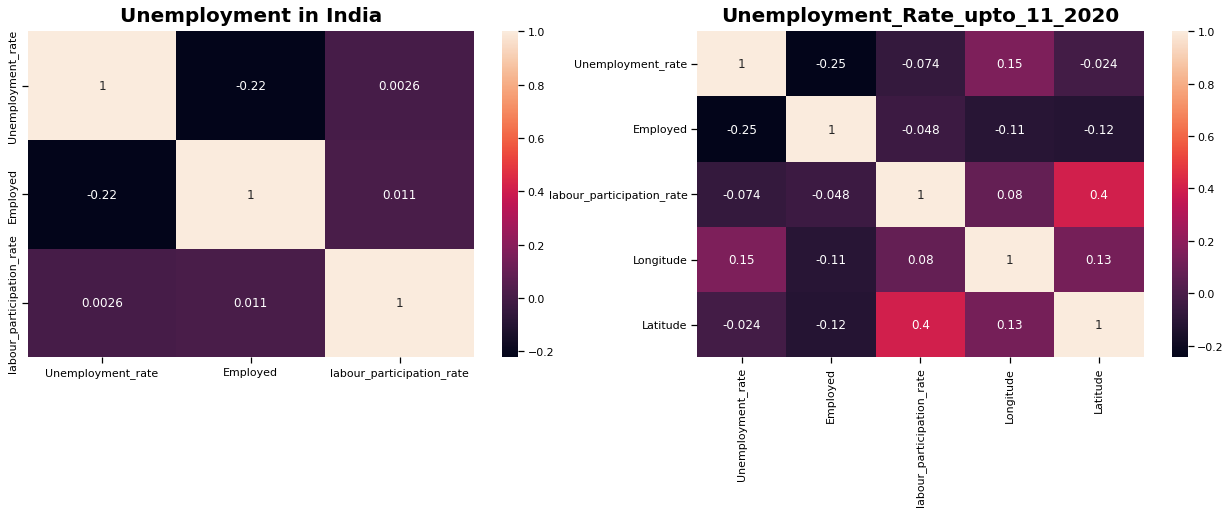

In [72]:
plt.figure(figsize=(22,6))
sns.set_context('notebook',font_scale=1)

plt.subplot(1,2,1)
plt.title('Unemployment in India',pad=10,fontsize=20,fontweight='black')
sns.heatmap(data1.corr(),annot=True)

plt.subplot(1,2,2)
plt.title('Unemployment_Rate_upto_11_2020',pad=10,fontsize=20,fontweight='black')
sns.heatmap(data2.corr(),annot=True)

In [33]:
data2.columns=['Region','Date','Frequency','Unemployment_rate','Employed','labour_participation_rate','Area','Longitude','Latitude']

###  Unemployment Rate

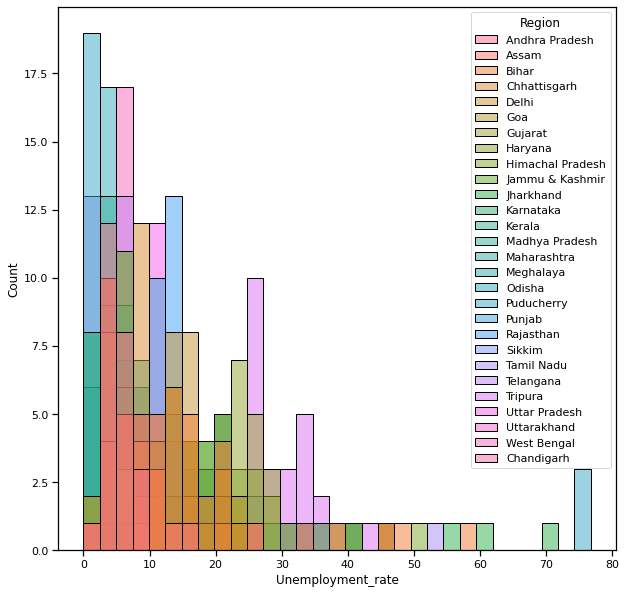

In [50]:
plt.figure(figsize=(10,10))
sns.histplot(data=data1,x='Unemployment_rate',hue='Region',)
plt.show()

###  Employment V/s Region

In [35]:
region = data2.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Employed", color="Region", title="Average Employed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Unemployment V/s Region

In [51]:
region = data2.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Unemployment_rate", color="Region", title="Average Employed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Employment And Unemployment

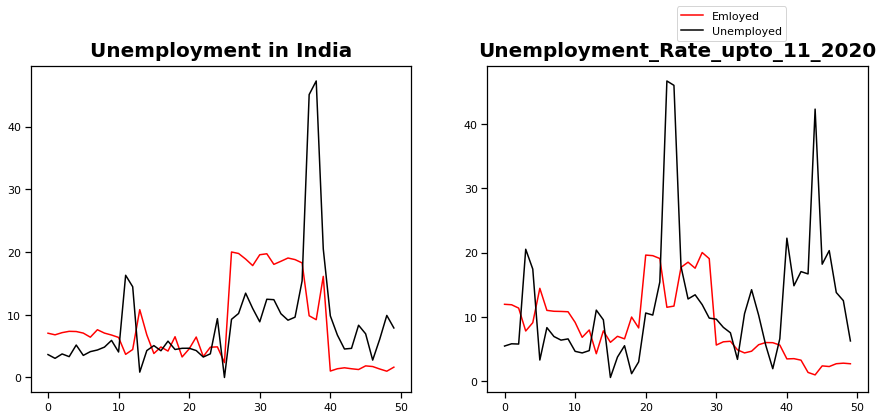

In [70]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)a
employed=data1['Employed'].iloc[:50]
unemployed=data1['Unemployment_rate'].iloc[:50]

employed=(employed-employed.min())/(employed.max()-employed.min())*19+1

plt.title('Unemployment in India',pad=10,fontsize=20,fontweight='black')
plt.plot(employed,color='red',label='Emloyed')
plt.plot(unemployed,color='black',label='Unemployed')

plt.legend(bbox_to_anchor=(2,1.2))
plt.subplot(1,2,2)
employed=data2['Employed'].iloc[:50]
unemployed=data2['Unemployment_rate'].iloc[:50]

employed=(employed-employed.min())/(employed.max()-employed.min())*19+1

plt.title('Unemployment_Rate_upto_11_2020',pad=10,fontsize=20,fontweight='black')
plt.plot(employed,color='red',label='Emloyrd')
plt.plot(unemployed,color='black',label='Unemployed')
plt.show()


### Unemployment rate in every State and Region

In [39]:
unemployment = data2[["Region", "Area", "Unemployment_rate"]]

fig = px.sunburst(unemployment, path=['Area','Region'], values='Unemployment_rate',
                  title= 'Unemployment rate in every State and Region', height=700)
fig.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Unemployment V/s Area

In [76]:
group=data1.groupby(['Region','area']).agg({'Unemployment_rate':'mean'})
group

Unemployment_rate
Region           area                    
Andhra Pradesh   Rural           5.526429
                 Urban           9.427857
Assam            Rural           4.490833
                 Urban           8.088571
Bihar            Rural          16.770000
                 Urban          21.066429
Chandigarh       Urban          15.991667
Chhattisgarh     Rural           6.628571
                 Urban          11.852143
Delhi            Rural          15.258571
                 Urban          17.732143
Goa              Rural           8.390000
                 Urban          10.158333
Gujarat          Rural           5.917143
                 Urban           7.410714
Haryana          Rural          25.012857
                 Urban          27.553571
Himachal Pradesh Rural          15.504286
                 Urban          21.576429
Jammu & Kashmir  Rural          14.951818
                 Urban          17.549000
Jharkhand        Rural          15.221429
                 Urban          25.948571
Karnataka        Rural           7.224286
                 Urban           6.127857
Kerala           Rural          10.341429
                 Urban           9.906429
Madhya Pradesh   Rural           5.653571
                 Urban           9.159286
Maharashtra      Rural           6.810000
                 Urban           8.305000
Meghalaya        Rural           2.475000
                 Urban           7.301538
Odisha           Rural           6.612857
                 Urban           4.702857
Puducherry       Rural           7.263333
                 Urban          12.745000
Punjab           Rural          11.925000
                 Urban          12.137143
Rajasthan        Rural          10.927143
                 Urban          17.189286
Sikkim           Rural           5.080000
                 Urban           8.153333
Tamil Nadu       Rural           8.775714
                 Urban           9.792857
Telangana        Rural           7.863571
                 Urban           7.612143
Tripura          Rural          27.166429
                 Urban          29.534286
Uttar Pradesh    Rural          10.208571
                 Urban          14.894286
Uttarakhand      Rural           4.882308
                 Urban           8.162143
West Bengal      Rural           7.572143
                 Urban           8.677143

# Conclusion:
### Unemployment rate was more in the urban areas of the states/Region